---

# **title: '머신러닝6 비지도학습'**

# **date: '2022-07-05 09:00'**

---

## 주성분 분석(PCA principal component analysis)
- 이론적으로 어려움
- 좌표계 공간개념(직교와 회전)
- 공분산(통계롼련 내용)
- Feature Engineerin기법
- StandardScaler()
- 현 머신러닝의 문제점: 컬럼의 갯수가 매우 많음(요소의 다양성)
 + 우리의 판단으로 컬럼갯수를 줄였으나 이제는 통계적으로 줄이자->차원축소

### 차원축소
 - 특성이 많으면 훈련데이터가 쉽게 과대적합이 된다.
 - 특성을 줄요서 학습모델의 성능을 향상시키다.
 - 모델의 학습시간을 감소시켜줌
 - 대표적인 방법론:PCA,EFA

### PCA vs EFA
 - EFA(탐색적요인분석), Factor Analysis
    - 예)국어 40, 수학 100, 과학 100, 영어 30
     + 평가: 귀학생은 언어영역은 수준이 낮은 편이나 수리영역은 수준이 높습니다.
     + 범주형&수치데이터셋
 - PCA(주성분분석)
   + 장비1, 장비2, 장비3.....
   + PC1, PC2, PC3,....PCN(ex.장비1과 장비2의 무게, 장비3과 장비4의 길이....)
   + 원래 가지고 있던 정보를 알 수 없음 (정보손실)
   + 범주형 데이터셋에는 사용 안됨->무조건 수치형 데이터셋에서만 사용!!
   + pca 실행전 ,반드시 표준화 처리(스케일링 실행)
  
 - p320



In [6]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-07-05 04:55:12--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-07-05 04:55:12--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-07-05 04:55:13--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [8]:
import numpy as np
fruits = np.load('/content/fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)
#300개의 행 10000개의 열
fruits_2d.shape

(300, 10000)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)#행을 50개로 압축
pca.fit(fruits_2d)

PCA(n_components=50)

In [10]:
print(pca.components_.shape)# 행을 300->50개로 줄임

(50, 10000)


In [11]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

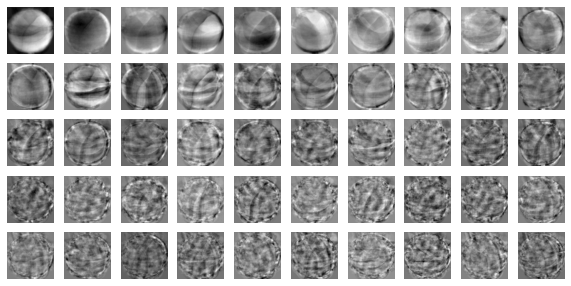

In [12]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [14]:
# 머신러닝에서 컬럼의 갯수를 10000개에서 50개로 줄임
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- 훈련데이터, 테스트 데이터로 분리


## 설명된 분산
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [15]:
# 원본 이미지 압축-> 결과값은 92%
print(np.sum(pca.explained_variance_ratio_))

0.9215343906846957


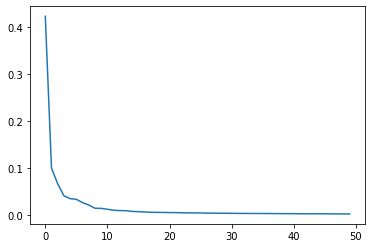

In [16]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [19]:
print(np.sum(pca.explained_variance_ratio_[:20]))

0.8416602343085364
